In [ ]:
!nvidia-smi

Thu Feb 29 11:11:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Install Yolov9 dependencies

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/content/yolov9


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

Getting the safety construction dataset from roboflow

In [ ]:
%cd {HOME}/yolov9
!pip install roboflow

import roboflow
roboflow.login()

from roboflow import Roboflow
rf = Roboflow(api_key="uykgRgZl1IYe55X8qWT7")
project = rf.workspace("roboflow-100").project("construction-safety-gsnvb")
dataset = project.version(2).download("yolov7")

[Errno 2] No such file or directory: '{HOME}/yolov9'
/content/yolov9
You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to construction-safety-2 in yolov7pytorch:: 100%|██████████| 2424/2424 [00:01<00:00, 1310.45it/s]


In [ ]:
vars(dataset)

{'name': 'construction safety',
 'version': '2',
 'model_format': 'yolov7pytorch',
 'location': '/content/yolov9/construction-safety-2'}

With the dataset downloaded we can now tran yolov9 model pretrained on gelan-c


In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data construction-safety-2/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

[Errno 2] No such file or directory: '{HOME}/yolov9'
/content/yolov9
2024-02-29 11:35:21.851911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 11:35:21.851963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 11:35:21.853216: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 11:35:22.867168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights={HOME}/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=construction-safety-2/data.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=6

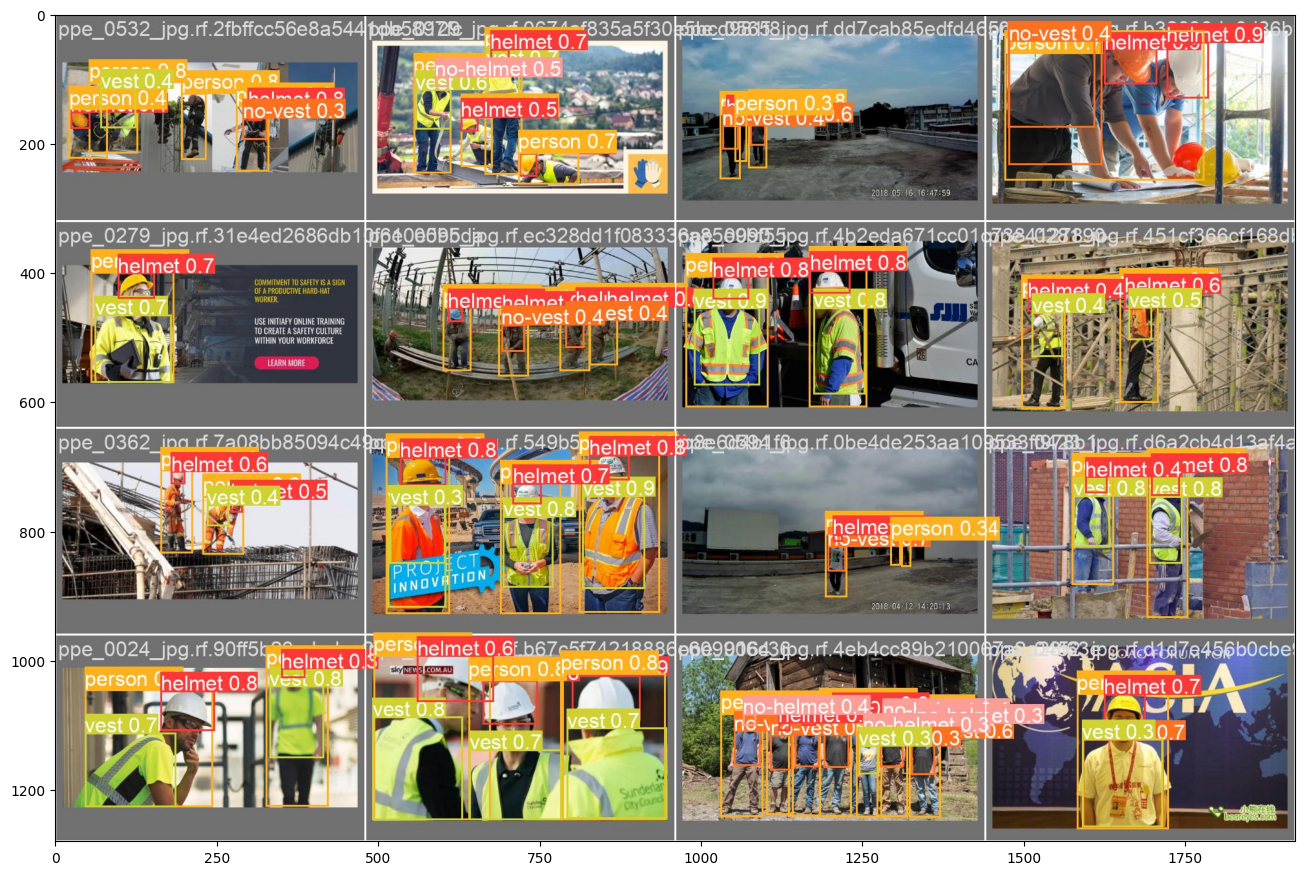

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(f"/content/yolov9/runs/train/exp/val_batch0_pred.jpg")
fig = plt.figure(figsize=(16,12))
imgplot = plt.imshow(img)
plt.show()

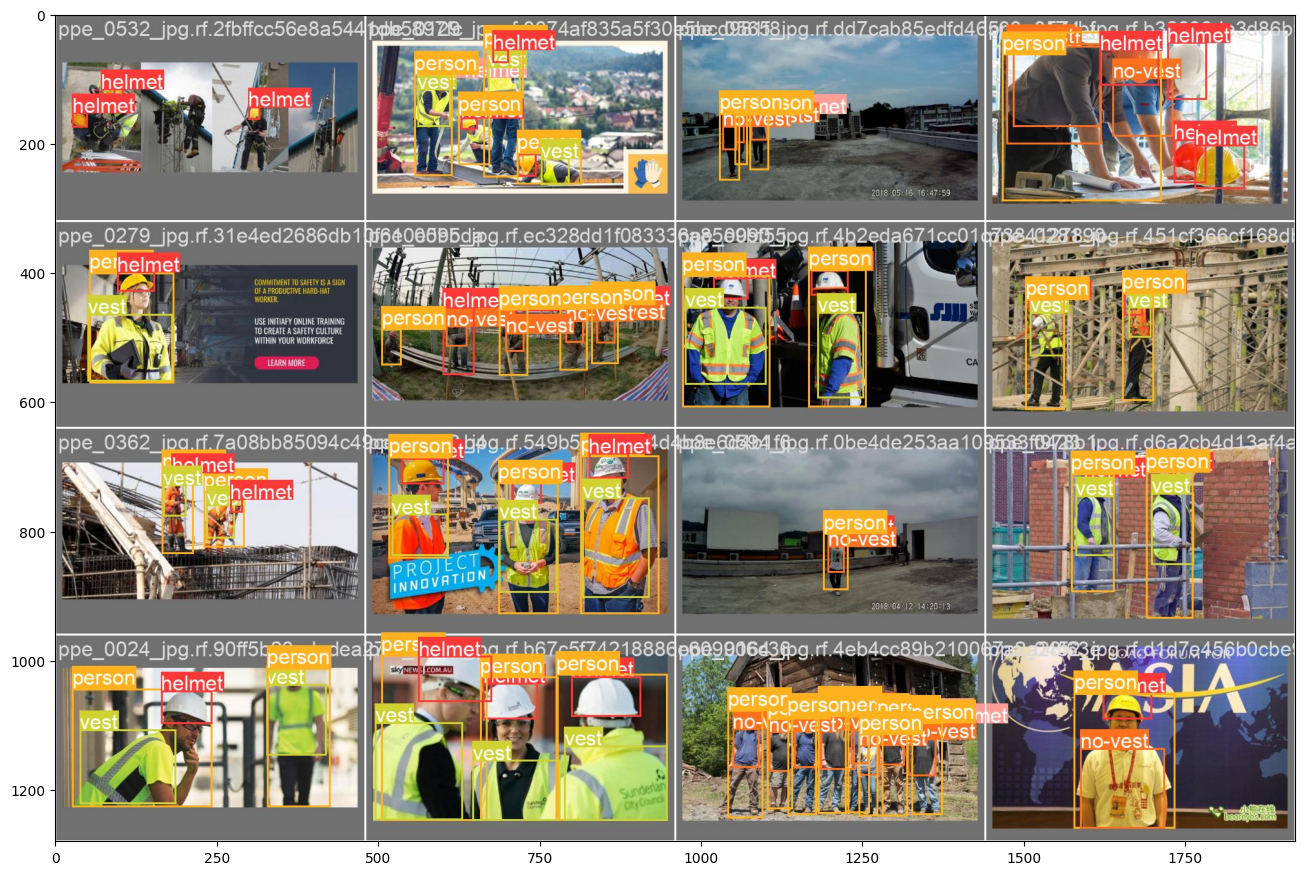

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(f"/content/yolov9/runs/train/exp/val_batch0_labels.jpg")
fig = plt.figure(figsize=(16,12))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from google.colab import files
files.download('/content/yolov9/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>